# Lección 1 

Esta lección corresponde a una introducción básica sobre Jupyter Notebooks. Le brindaremos recomendaciones básicas sobre como utilizar la herramienta, así como hacer un "Hello World" equivalente in la API de ArcGIS for Python.

## Ocultar contraseña

Como primer paso para el tutorial, he ocultado la contraseña utilizando la libreria getpass. Esto para no mostrar mis datos personales en el video tutorial

Ayuda: Como ocultar las contraseñas https://docs.python.org/2/library/getpass.html

In [4]:
import getpass

In [5]:
password = getpass.getpass('Enter your password')

Enter your password········


# Qué es el modulo GIS?

SIG es el objeto más importante cuando se trabaja con la API de ArcGIS para Python. El objeto SIG representa el SIG en línea con el que está trabajando, ya sea ArcGIS Online o un Portal for ArcGIS. Utiliza el objeto SIG para consumir y publicar contenido SIG y los administradores pueden usarlo para administrar usuarios, grupos y almacenes de datos SIG. El objeto SIG también incluye una serie de herramientas, incluidas herramientas de análisis espacial, herramientas de análisis de big data, herramientas de análisis de ráster, así como servicios auxiliares como geocodificación y geometría para ayudar en sus flujos de trabajo.

# Recomendaciones

1-No poner no todo el codigo en una celda
La primera diferencia de Jupyter Notebook con el IDE tradicional de Python, es que el código se divide en secciones llamadas celdas.

2-Hay diferentes tipos de celdas.
A-Las lineas de comentarios se llaman "Markdown", son utiles para documentar y agregar notas de ayuda como el clásico "Leer" o indicar las descripciones del código.
B-Las celdas de tipo "Code" sirven para escribir el código y ejecutar los objetos, modulos o funciones.
C-Las celdas "Heading" sirven para mostrar titulos en el Jupyter Notebook

3-Ejecutar las celdas (shift + enter).
Al segmentar las celdas se debe utilizar el comando shift + enter para ejecutar la secuencia para todo el proceso, ya que si solo utiliza la funcion run, se ejecutará la celda individual. 

# Hello World en API for Python for ArcGIS

In [6]:
from arcgis.gis import GIS
gis = GIS('https://geotec.maps.arcgis.com', 'mercechinchilla', password)
groups = gis.groups.search('*', max_groups=15)
print (gis)

GIS @ https://geotec.maps.arcgis.com version:7.3


In [7]:
print (groups)

[<Group title:"A" owner:SDamazzio>, <Group title:"Apps" owner:mercechinchilla>, <Group title:"Atención de Emergencias" owner:kfallas>, <Group title:"Avaluos" owner:mercechinchilla>, <Group title:"Basemap Gallery" owner:lvargas>, <Group title:"borrar" owner:fiorodmar>, <Group title:"CITCGG" owner:srodriguez>, <Group title:"CNFL Circuitos Secundarios" owner:kabarca>, <Group title:"CoBas_Mobil" owner:nmolina82>, <Group title:"COCOSA_DEMO" owner:kabarca>, <Group title:"Contenido de Esri Salud" owner:jermaine3186>, <Group title:"Contenido Destacado Costa Rica" owner:demos_geotec>, <Group title:"Contenido Destacado Nicaragua" owner:demos_geotec>, <Group title:"Control de Horas ICE, edición" owner:jermaine3186>, <Group title:"Control de Horas ICE, visores" owner:jermaine3186>]


In [8]:
user= gis.users.get('mercechinchilla')

<User username:mercechinchilla>
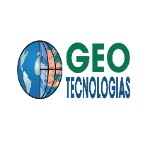

In [9]:
user

In [10]:
user['firstName']

'Mercedes'

In [11]:
mygis = GIS()

In [12]:
mygis.map()

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
GIS?

In [14]:
map = gis.map("Palm Springs, CA", zoomlevel=12)

In [15]:
map

MapView(layout=Layout(height='400px', width='100%'), zoom=12.0)

<Item title:"Loop7Victor_WFL" type:Feature Layer Collection owner:kgrahamACBCI>
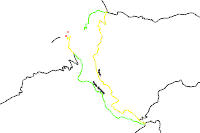

<Item title:"Loop5EastFork_WFL" type:Feature Layer Collection owner:kgrahamACBCI>
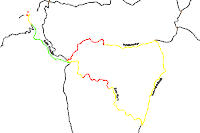

<Item title:"Loop2WestFork_WFL" type:Feature Layer Collection owner:kgrahamACBCI>
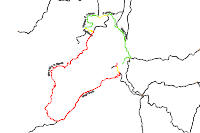

In [16]:
from IPython.display import display
items = gis.content.search('Palm Springs Trails', item_type= "Feature Layer", outside_org= True)
for item in items [:3]:
    display(item)

In [17]:
map.add_layer(items[1].layers[0])

In [18]:
map

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=12.0)